Demo by using GAN to generate tabular data

In [22]:
import os
import pandas as pd
import numpy as np
import sklearn
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tabgan.sampler import OriginalGenerator, GANGenerator

import matplotlib.pyplot as plt

In [23]:
from data_generator import DataGenerator
data_generator = DataGenerator()

In [24]:
# using GAN to improve random forest
def fit_predict(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    return sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

data_generator.dataset = '24_mnist'
data_generator.seed = 42
data = data_generator.generator(la=0.1)
clf = RandomForestClassifier(n_estimators=25, max_depth=6)

In [25]:
X_train, X_test, y_train, y_test = data['X_train'], data['X_test'], data['y_train'], data['y_test']

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train = pd.DataFrame(y_train, columns=['target'])
y_test = pd.DataFrame(y_test, columns=['target'])

print("initial metric", fit_predict(clf, X_train, y_train, X_test, y_test))

initial metric 0.9509093835506197


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_train)

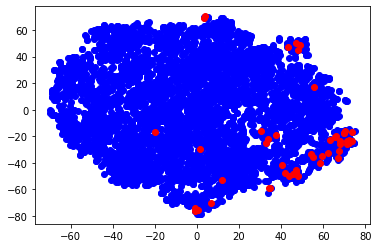

In [27]:
plt.scatter(X_tsne[y_train.values.squeeze()==0, 0], X_tsne[y_train.values.squeeze()==0, 1], color='blue')
plt.scatter(X_tsne[y_train.values.squeeze()==1, 0], X_tsne[y_train.values.squeeze()==1, 1], color='red')

Oversampling

SMOTE

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

用GAN生成样本

In [28]:
# new_train1, new_target1 = OriginalGenerator().generate_data_pipe(X_train,
#                                                                  y_train,
#                                                                  X_train, )
# print("OriginalGenerator metric", fit_predict(clf, new_train1, new_target1, X_test, y_test))

new_train1, new_target1 = GANGenerator(gen_x_times=0.2).generate_data_pipe(X_train,
                                                                           y_train,
                                                                           X_train, )
print("GANGenerator metric", fit_predict(clf, new_train1, new_target1, X_test, y_test))

Fitting CTGAN transformers for each column:   0%|          | 0/101 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

GANGenerator metric 0.9448506587569842


In [29]:
print(f'原始X: {X_train.shape}')
print(f'增强X: {new_train1.shape}')

print(f'原始labeled anomalies :{sum(y_train.values.squeeze())}')
print(f'增强labeled anomalies :{sum(new_target1)}')

原始X: (5322, 100)
增强X: (5239, 100)
原始labeled anomalies :49
增强labeled anomalies :44


In [30]:
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(new_train1)

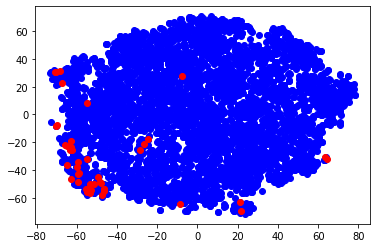

In [31]:
plt.scatter(X_tsne[new_target1.values==0, 0], X_tsne[new_target1.values==0, 1], color='blue')
plt.scatter(X_tsne[new_target1.values==1, 0], X_tsne[new_target1.values==1, 1], color='red')